In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report , r2_score , ConfusionMatrixDisplay

In [22]:
df = pd.read_csv("Titanic-Dataset.csv")

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [25]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [28]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
df = df.drop('Cabin', axis=1)


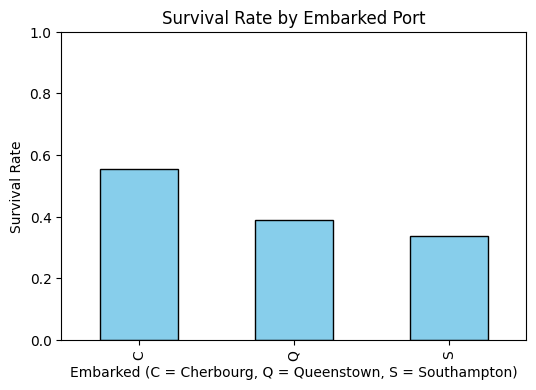

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


In [30]:

survival_by_embarked = df.groupby("Embarked")["Survived"].mean()

plt.figure(figsize=(6,4))
survival_by_embarked.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Survival Rate by Embarked Port")
plt.xlabel("Embarked (C = Cherbourg, Q = Queenstown, S = Southampton)")
plt.ylabel("Survival Rate")
plt.ylim(0,1)
plt.show()

print(survival_by_embarked)


In [32]:
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_dummies], axis=1)


In [33]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,True,False,False


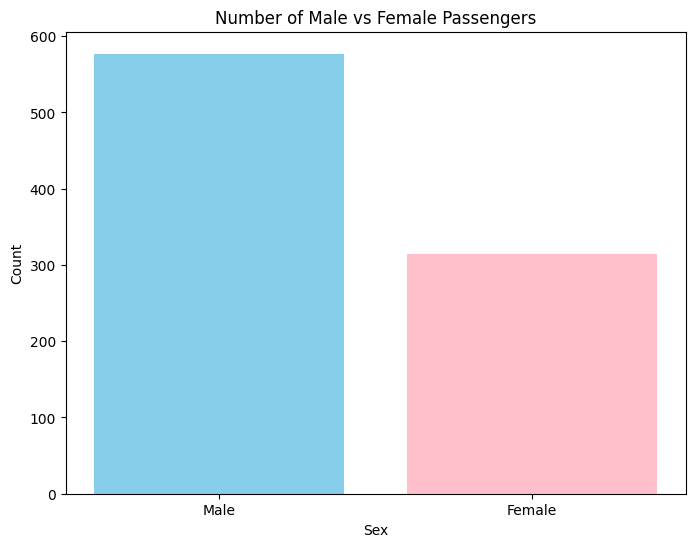

In [38]:
male = df[df['Sex'] == 'male']
female = df[df['Sex'] == 'female']

counts = [len(male) , len(female)]
labels = ['Male', 'Female']

plt.figure(figsize=(8,6))
plt.bar(labels, counts, color=['skyblue','pink'])
plt.title("Number of Male vs Female Passengers")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()


In [43]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [44]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,S,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,S,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,S,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,S,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,S,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C,True,False,False


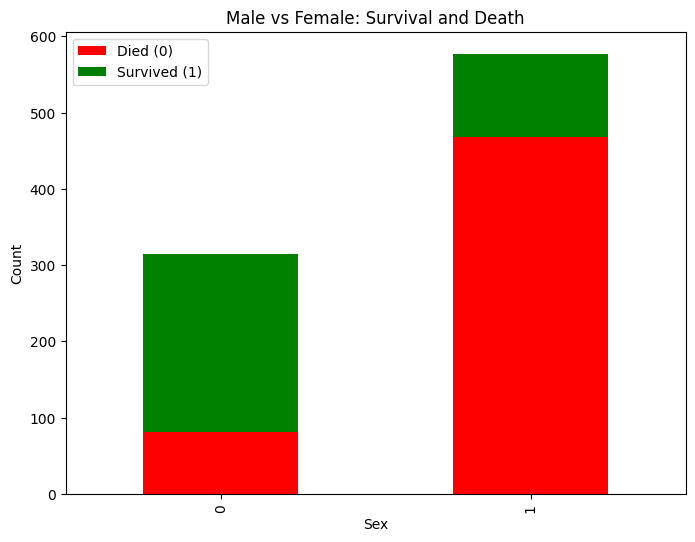

In [46]:
sex_sur = df.groupby(['Sex' , 'Survived']).size().unstack()
sex_sur.plot(kind='bar', stacked=True, color=['red','green'], figsize=(8,6))

plt.title("Male vs Female: Survival and Death")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(["Died (0)", "Survived (1)"])


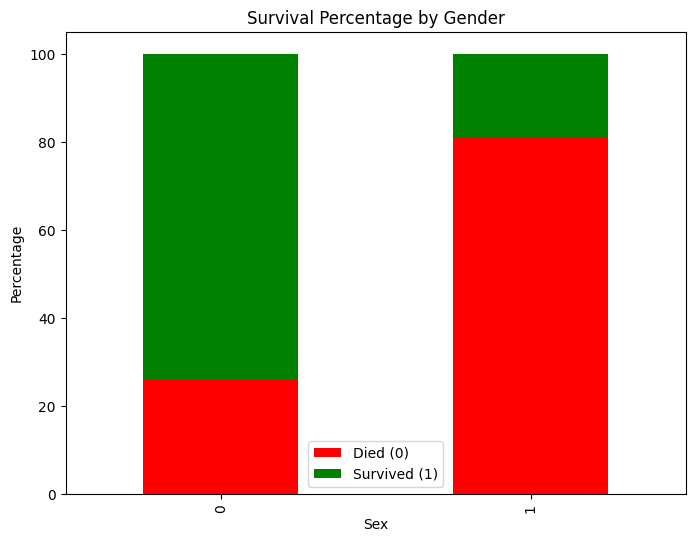

In [47]:

sex_survival = df.groupby(['Sex','Survived']).size().unstack()


sex_survival_percent = sex_survival.div(sex_survival.sum(axis=1), axis=0) * 100


sex_survival_percent.plot(kind='bar', stacked=True, color=['red','green'], figsize=(8,6))

plt.title("Survival Percentage by Gender")
plt.xlabel("Sex")
plt.ylabel("Percentage")
plt.legend(["Died (0)", "Survived (1)"])
plt.show()


In [48]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,S,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,S,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,S,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,S,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,S,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C,True,False,False


In [51]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [53]:
df['Embarked'] = df['Embarked'].dropna()

In [55]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [56]:
print(df['Embarked'].isnull().sum())


2


In [57]:
df = df.dropna(subset=['Embarked'])


In [58]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,S,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,S,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,S,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,S,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,S,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C,True,False,False


In [59]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [82]:
X = df[['Pclass' , 'Sex' , 'Age' , 'SibSp' , 'Parch' , 'Fare'  , 'Embarked_Q' , 'Embarked_S']]
y = df['Survived']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [84]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train , y_train)

LogisticRegression(max_iter=1000)

In [85]:
y_pred = model.predict(X_test)

In [86]:
print(f"Accuracy Score {accuracy_score(y_test , y_pred)}")
print(f"Confusion Matrix {confusion_matrix(y_test , y_pred)}")
print(f"Classification Report {classification_report(y_test , y_pred)}")
print(f"Model Accuracy {r2_score(y_test , y_pred)}")

Accuracy Score 0.7808988764044944
Confusion Matrix [[85 24]
 [15 54]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.78      0.81       109
           1       0.69      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.79      0.78      0.78       178

Model Accuracy 0.07698444355803769


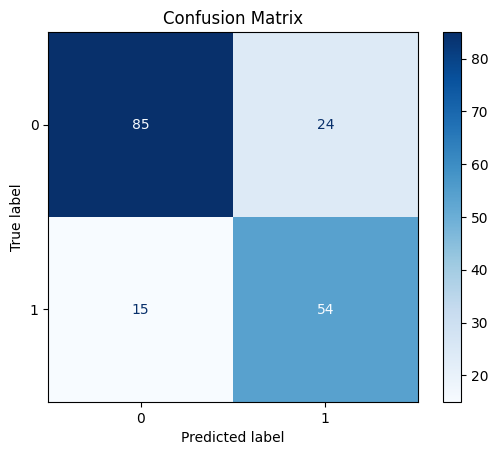

In [87]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

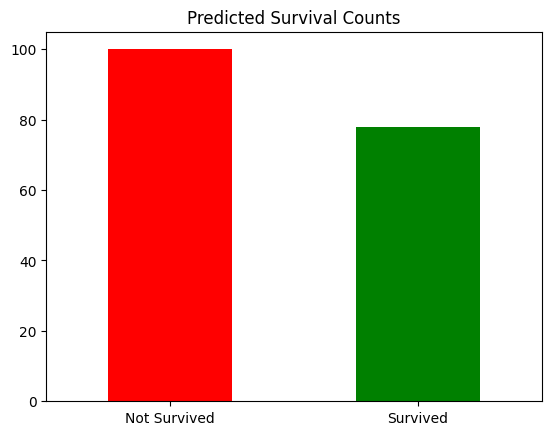

In [88]:

pd.Series(y_pred).value_counts().plot(kind="bar", color=["red","green"])
plt.xticks([0,1], ["Not Survived","Survived"], rotation=0)
plt.title("Predicted Survival Counts")
plt.show()


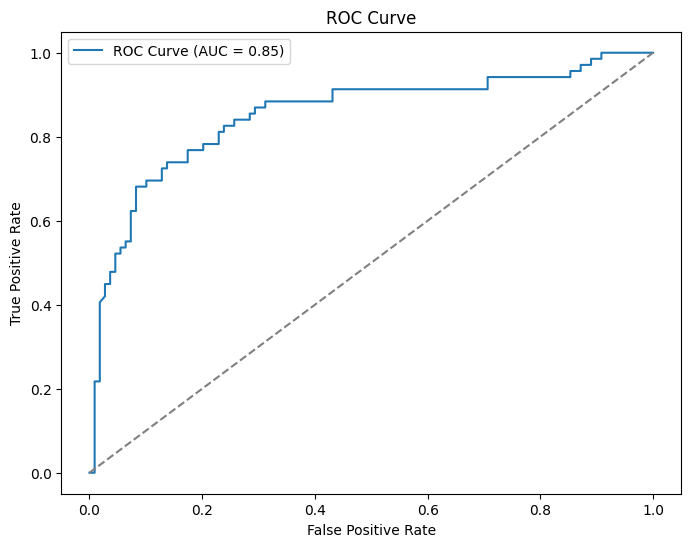

In [89]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


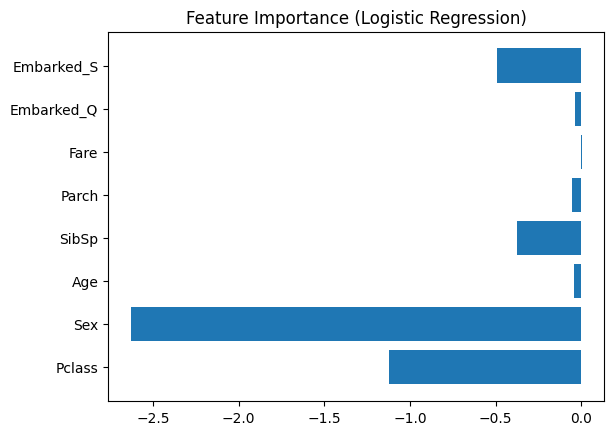

In [90]:
importances = model.coef_[0]
features = X.columns
plt.barh(features, importances)
plt.title("Feature Importance (Logistic Regression)")
plt.show()


In [91]:
import joblib
joblib.dump(model, "titanic_model.pkl")


['titanic_model.pkl']